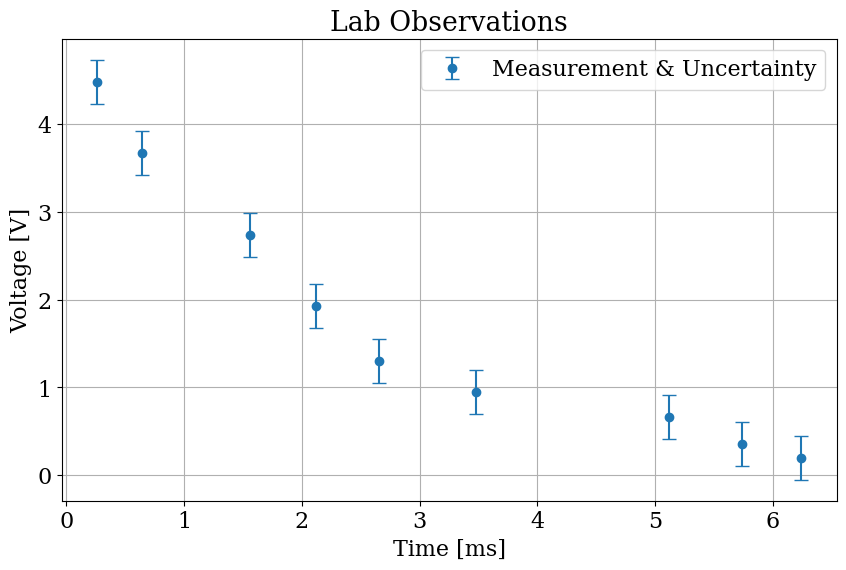

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size': 16,'font.family':'serif'})

# For measurement uncertainty we are estimating that we measured within 1/10 of a division using the cursors. 
# We have 2.5 V and 17.16 ms per division. I know there is uncertainty in the oscilliscope itself but 
# we don't have any spec sheet. 

# Read in the lab data
header = ["dx","dy"]
data = np.genfromtxt("lab_data.csv", delimiter=",", skip_header=4, names=header)
dx = np.flip(data["dx"])
dy = data["dy"] + 0.075
unc_dy = 2.5 / 10 # volts
unc_dx = 17.16 / 10 # ms

fig = plt.figure(figsize=(10,6))
plt.title("Lab Observations")
plt.xlabel("Time [ms]")
plt.ylabel("Voltage [V]")
plt.errorbar(dx, dy, yerr=unc_dy, fmt='o', label="Measurement & Uncertainty", capsize=5)
plt.grid()
plt.legend()
plt.show()
fig.savefig("raw_data.pdf")


V(t) = A*exp(-t/RC)
A = 5.036892885045899 +/- 0.2559409184961759 V
RC = 2.194441615554303 +/- 0.18749171845964213 ms
Reduced Chi Squared = 0.3670790347376485


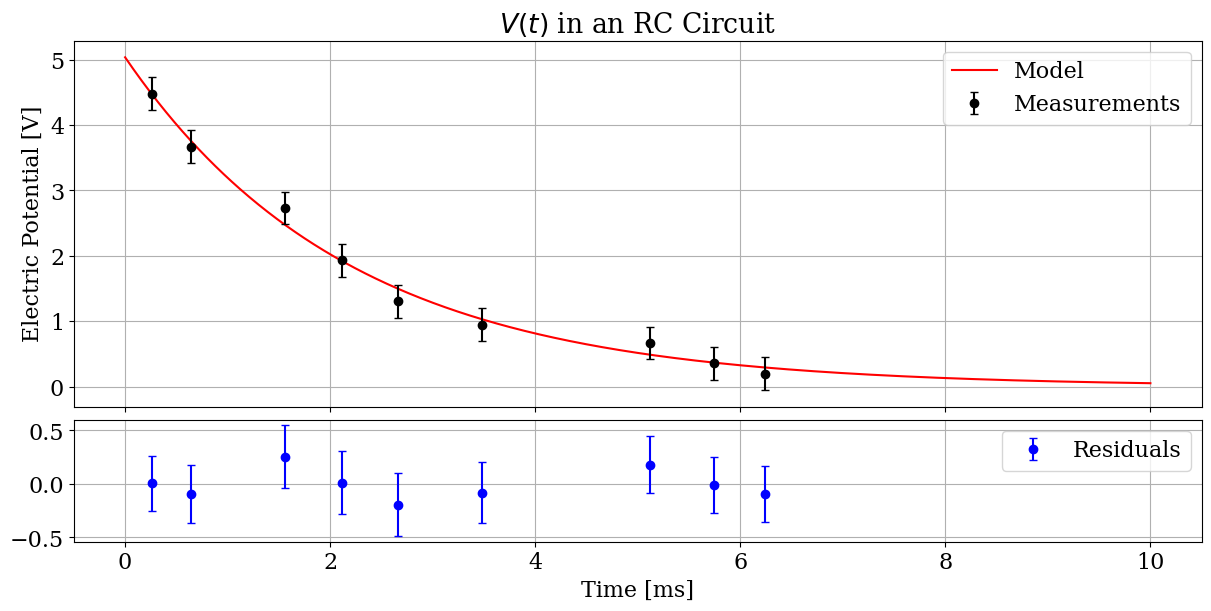

In [15]:
# Fit the model function to the data
def V(t,A,RC):
    return A*np.exp(-t/RC)
def chiSqr(data, model, unc):
    return np.sum((data - model)**2 / unc**2)
def reducedChiSqr(data, model, unc, nParams):
    return chiSqr(data,model,unc) / (len(data) - nParams)

popt, pcov = curve_fit(V,dx,dy,p0=[5,2.7], sigma=unc_dy*np.ones_like(dy), absolute_sigma=True)
param_unc = np.sqrt(np.diag(pcov))
fit_reducedChiSqr = reducedChiSqr(dy, V(dx, *popt), unc_dy, 2)


def dV(t,A,RC):
    return np.sqrt(np.exp(-2*t/RC)*(param_unc[0]**2 + (A*t/RC**2)**2)*param_unc[1]**2)

print("V(t) = A*exp(-t/RC)")
print(f"A = {popt[0]} +/- {param_unc[0]} V")
print(f"RC = {popt[1]} +/- {param_unc[1]} ms")
print(f"Reduced Chi Squared = {fit_reducedChiSqr}")

fig, axs = plt.subplots(2,1,layout="constrained",figsize=(12,6),gridspec_kw={'height_ratios': [3, 1]},sharex=True)
plotVals = np.linspace(0,10,1000)
axs[0].set_title(r"$V(t)$ in an RC Circuit")
axs[0].plot(plotVals, V(plotVals, *popt), color="red", label=r"Model")
axs[0].errorbar(dx, dy, color="black", label="Measurements", yerr=unc_dy,fmt="o",capsize=3)
axs[0].grid()
axs[0].legend()
axs[0].set_ylabel("Electric Potential [V]")

residual_uncertainty = np.sqrt(unc_dy**2 + dV(dx, *popt)**2)
residuals = dy - V(dx, *popt)
axs[1].errorbar(dx, residuals, color="blue", yerr=residual_uncertainty,fmt="o",label="Residuals",capsize=3)
axs[1].set_xlabel("Time [ms]")
axs[1].legend()
axs[1].grid()
fig.savefig("model.pdf")

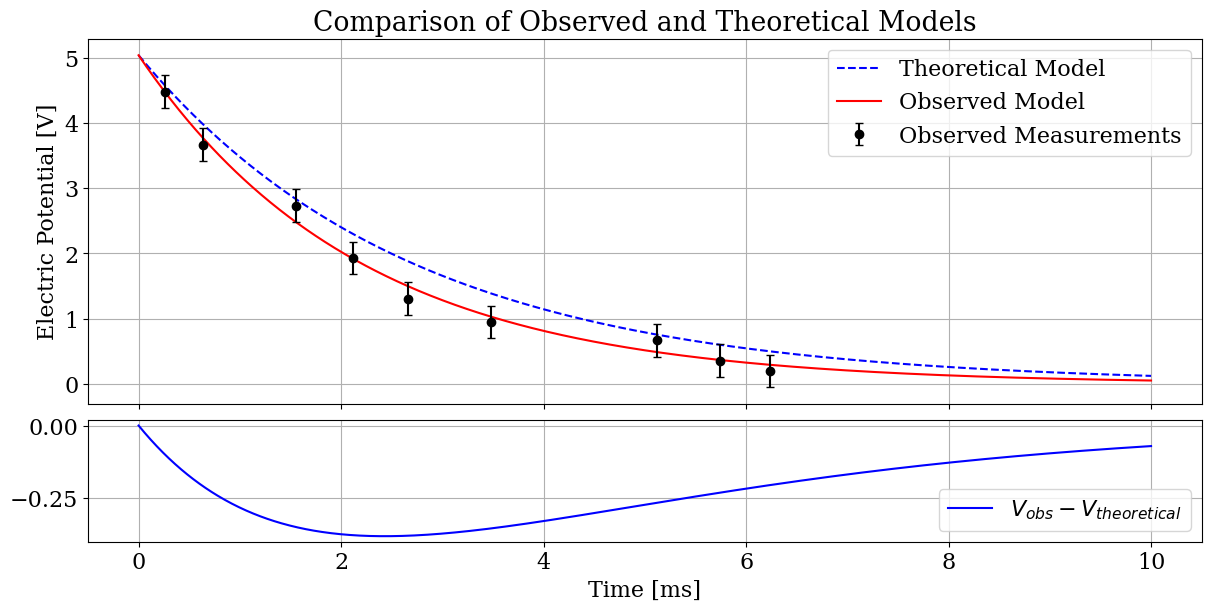

In [12]:
# Ideal Scenario
# R = 27 kOhm
# C = 0.1 uF
RC_Ideal = 2.7 # ms

# residuals of observed and theoretical model
residualsIdeal = V(plotVals,*popt) - V(plotVals,popt[0],RC_Ideal)

fig, axs = plt.subplots(2,1,layout="constrained",figsize=(12,6),gridspec_kw={'height_ratios': [3, 1]},sharex=True)
plotVals = np.linspace(0,10,1000)
axs[0].set_title("Comparison of Observed and Theoretical Models")
axs[0].plot(plotVals, V(plotVals,popt[0],RC_Ideal), color="blue", label="Theoretical Model",ls="--")
axs[0].plot(plotVals, V(plotVals,*popt), color="red", label="Observed Model")
axs[0].errorbar(dx, dy, color="black", label="Observed Measurements", yerr=unc_dy,fmt="o",capsize=3)
axs[0].grid()
axs[0].legend()
axs[0].set_ylabel("Electric Potential [V]")

axs[1].plot(plotVals, residualsIdeal, color="blue", label=r"$V_{obs} - V_{theoretical}$")
axs[1].set_xlabel("Time [ms]")
axs[1].legend()
axs[1].grid()
fig.savefig("comparison.pdf")


